In [37]:
# import sys
# sys.path.append("..")
import cupy as cp
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 10000
batch_size = 30
hidden_size = 10
learning_rate = 0.1

# 데이터 읽기, 불러오기
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward(dout=1)
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print("| epoch %d | iter %d/%d | loss %.2f" 
                  % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

        

| epoch 1 | iter 10/10 | loss 1.27
| epoch 2 | iter 10/10 | loss 1.23
| epoch 3 | iter 10/10 | loss 1.20
| epoch 4 | iter 10/10 | loss 1.18
| epoch 5 | iter 10/10 | loss 1.16
| epoch 6 | iter 10/10 | loss 1.14
| epoch 7 | iter 10/10 | loss 1.12
| epoch 8 | iter 10/10 | loss 1.10
| epoch 9 | iter 10/10 | loss 1.09
| epoch 10 | iter 10/10 | loss 1.07
| epoch 11 | iter 10/10 | loss 1.06
| epoch 12 | iter 10/10 | loss 1.05
| epoch 13 | iter 10/10 | loss 1.04
| epoch 14 | iter 10/10 | loss 1.02
| epoch 15 | iter 10/10 | loss 1.01
| epoch 16 | iter 10/10 | loss 1.00
| epoch 17 | iter 10/10 | loss 0.99
| epoch 18 | iter 10/10 | loss 0.98
| epoch 19 | iter 10/10 | loss 0.98
| epoch 20 | iter 10/10 | loss 0.97
| epoch 21 | iter 10/10 | loss 0.96
| epoch 22 | iter 10/10 | loss 0.95
| epoch 23 | iter 10/10 | loss 0.95
| epoch 24 | iter 10/10 | loss 0.94
| epoch 25 | iter 10/10 | loss 0.93
| epoch 26 | iter 10/10 | loss 0.92
| epoch 27 | iter 10/10 | loss 0.92
| epoch 28 | iter 10/10 | loss 0.91
|

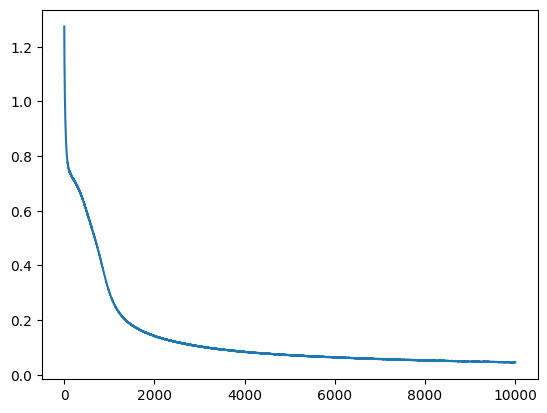

In [32]:
plt.plot(np.arange(len(loss_list)), loss_list)

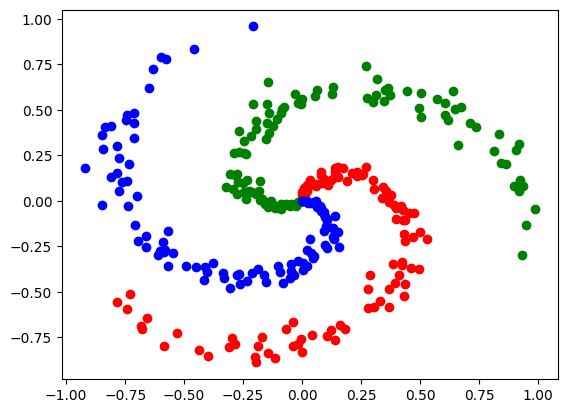

In [33]:
x, t = spiral.load_data()

x_0 = x[t[:, 0]==1] # 0열에서 1인 애들만(원핫백터에서)
x_1 = x[t[:, 1]==1]
x_2 = x[t[:, 2]==1]

plt.plot(x_0[:, 0], x_0[:, 1], "ro")
plt.plot(x_1[:, 0], x_1[:, 1], "go")
plt.plot(x_2[:, 0], x_2[:, 1], "bo")

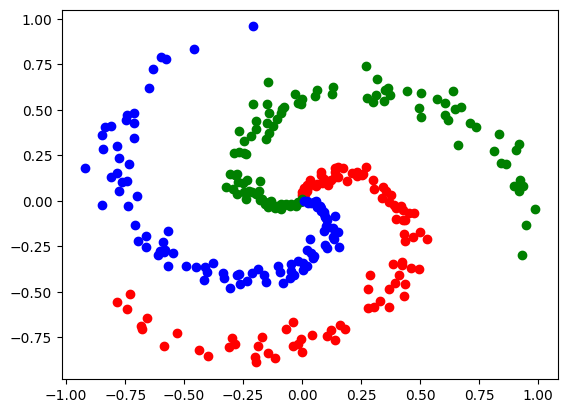

In [36]:
# 예측 값 데이터 확인
y = model.predict(x)

y_0 = x[np.argmax(y, axis=1) == 0]
y_1 = x[np.argmax(y, axis=1) == 1]
y_2 = x[np.argmax(y, axis=1) == 2]


plt.plot(y_0[:, 0], y_0[:, 1], "ro")
plt.plot(y_1[:, 0], y_1[:, 1], "go")
plt.plot(y_2[:, 0], y_2[:, 1], "bo")

